In [1]:
import os
import numpy as np
import argparse
import re
import sqlite3
from fitter import Fitter
import fitter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from matplotlib import ticker

db_path = '/nfs/home/zhangchuanqi/lvna/for_xs/catlog/single-profiling/xalancbmk/l3-8/hm.db'
con = sqlite3.connect(db_path)
cur = con.cursor()

all_set = 16384
class SaturatedInteger:
    def __init__(self, val, lo, hi):
        self.real, self.lo, self.hi = val, lo, hi

    def __add__(self, other):
        return min(self.real + other.real, self.hi)

    def __sub__(self, other):
        return max(self.real - other.real, self.lo)

    def isSaturated(self):
        return self.real == self.hi
    def isLowSaturated(self):
        return self.real == self.lo

    def isHighHalf(self):
        return self.real > (self.hi + self.lo)/2
    def idLowHalf(self):
        return self.real <= (self.hi + self.lo)/2

    def isHighPortion(self,portion):
        return self.real > self.hi*portion + self.lo*(1-portion)
    def isLowPortion(self,portion):
        return self.real <= self.hi*portion + self.lo*(1-portion)

    def __get__(self):
        return self.real
    def __set__(self, val):
        if val > self.hi:
            self.real = self.hi
        elif val < self.lo:
            self.real = self.lo
        else:
            self.real = val

max_time_query = "SELECT max(STAMP) FROM HitMissTrace"

interval = 1000
f = cur.execute(max_time_query)
out_res = [x[0] for x in f]
print(out_res)
nbins = out_res[0] // interval

all_access_query = 'SELECT STAMP FROM HitMissTrace'
f = cur.execute(all_access_query)
out_res = [x[0] for x in f]
interval_counts,_ = np.histogram(out_res,bins=nbins)
print(interval_counts)

max_access_cnt_in_t = 100
access_bins = np.arange(0,max_access_cnt_in_t+1,1)
print(access_bins)

[115711960]
[ 7  9  5 ... 12 12 16]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


[ 3560  2400  4380  6603  9062 10356 10207  9825  9076  8146  6767  6174
  5611  5297  4804  4050  3077  2277  1617   926   525   249   160   112
   102    84    56    52    45    38    21    13    16     8     6     2
     2     1     2     0     0     0     1     0     0     0     1     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 25.87it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,0.000032,2135.255683,-1480.938052,inf,0.590000,1.091993e-33
gamma,0.000039,2049.081264,-1462.470487,inf,0.627241,1.416006e-38
lognorm,0.000042,2394.898568,-1453.803972,inf,0.590000,1.092005e-33
expon,0.000045,2309.724535,-1451.244651,inf,0.692756,1.952903e-48
chi2,0.000047,1950.681122,-1443.827954,inf,0.697026,3.837326e-49


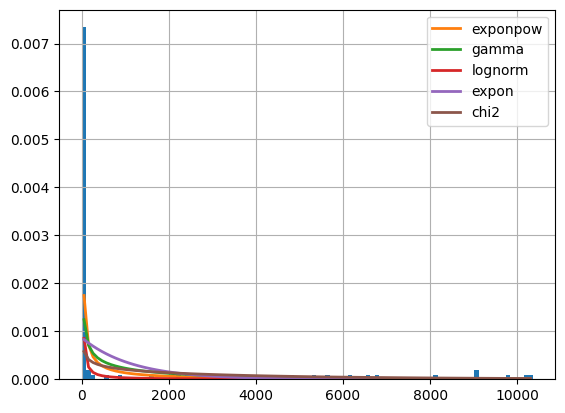

In [2]:
p_counts,_ = np.histogram(interval_counts,bins=access_bins)
print(p_counts)

f = Fitter(p_counts, distributions=fitter.get_common_distributions())
f.fit()
f.summary()

In [3]:
import os
import numpy as np
import argparse
import re
import sqlite3
from fitter import Fitter
import fitter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from matplotlib import ticker

db_path = '/nfs/home/zhangchuanqi/lvna/for_xs/catlog/single-profiling/xalancbmk/l3-8/hm.db'
con = sqlite3.connect(db_path)
cur = con.cursor()

all_set = 16384
class SaturatedInteger:
    def __init__(self, val, lo, hi):
        self.real, self.lo, self.hi = val, lo, hi

    def __add__(self, other):
        return min(self.real + other.real, self.hi)

    def __sub__(self, other):
        return max(self.real - other.real, self.lo)

    def isSaturated(self):
        return self.real == self.hi
    def isLowSaturated(self):
        return self.real == self.lo

    def isHighHalf(self):
        return self.real > (self.hi + self.lo)/2
    def idLowHalf(self):
        return self.real <= (self.hi + self.lo)/2

    def isHighPortion(self,portion):
        return self.real > self.hi*portion + self.lo*(1-portion)
    def isLowPortion(self,portion):
        return self.real <= self.hi*portion + self.lo*(1-portion)

    def __get__(self):
        return self.real
    def __set__(self, val):
        if val > self.hi:
            self.real = self.hi
        elif val < self.lo:
            self.real = self.lo
        else:
            self.real = val

max_time_query = "SELECT max(STAMP) FROM HitMissTrace"

interval = 10000
f = cur.execute(max_time_query)
out_res = [x[0] for x in f]
print(out_res)
nbins = out_res[0] // interval

all_access_query = 'SELECT STAMP FROM HitMissTrace'
f = cur.execute(all_access_query)
out_res = [x[0] for x in f]
interval_counts,_ = np.histogram(out_res,bins=nbins)
print(interval_counts)

max_access_cnt_in_t = 100
access_bins = np.arange(0,max_access_cnt_in_t+1,1)
print(access_bins)

[115711960]
[ 72  68  90 ... 146 112 116]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


[  0   0   0   0   0   0   0   1   0   1   4   7   4   5   3  14  10  23
  11  19  12  11  18  22  27  25  25  31  32  40  31  32  31  48  54  70
  67  79  78  71  61  69  59  65  67  59  66  52  72  79  94 113 112 154
 158 200 190 192 213 208 190 174 163 175 189 158 158 145 127 137 131 125
 121 121  94 111 100 103  95 111  76  84  88  85  74  89  76  85  80  79
  99  90  85  82 102  78  94  92  87 185]


Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 23.52it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,0.003466,1124.112738,-1013.169507,inf,0.110491,1.613723e-01
lognorm,0.003532,1553.961351,-1011.277628,inf,0.440821,3.255031e-18
gamma,0.003608,1225.044123,-1009.149668,inf,0.359755,4.267773e-12
expon,0.003636,1149.117944,-1013.005297,inf,0.178810,2.869915e-03
powerlaw,0.003777,1079.662371,-1004.577953,inf,0.218222,1.161961e-04


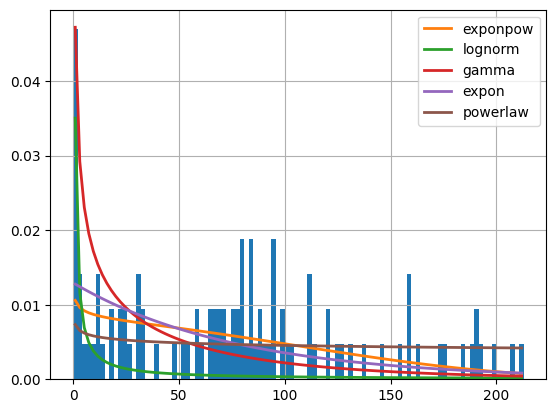

In [4]:
p_counts,_ = np.histogram(interval_counts,bins=access_bins)
print(p_counts)

f = Fitter(p_counts, distributions=fitter.get_common_distributions())
f.fit()
f.summary()

In [5]:
import os
import numpy as np
import argparse
import re
import sqlite3
from fitter import Fitter
import fitter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from matplotlib import ticker

db_path = '/nfs/home/zhangchuanqi/lvna/for_xs/catlog/single-profiling/xalancbmk/l3-8/hm.db'
con = sqlite3.connect(db_path)
cur = con.cursor()

all_set = 16384
class SaturatedInteger:
    def __init__(self, val, lo, hi):
        self.real, self.lo, self.hi = val, lo, hi

    def __add__(self, other):
        return min(self.real + other.real, self.hi)

    def __sub__(self, other):
        return max(self.real - other.real, self.lo)

    def isSaturated(self):
        return self.real == self.hi
    def isLowSaturated(self):
        return self.real == self.lo

    def isHighHalf(self):
        return self.real > (self.hi + self.lo)/2
    def idLowHalf(self):
        return self.real <= (self.hi + self.lo)/2

    def isHighPortion(self,portion):
        return self.real > self.hi*portion + self.lo*(1-portion)
    def isLowPortion(self,portion):
        return self.real <= self.hi*portion + self.lo*(1-portion)

    def __get__(self):
        return self.real
    def __set__(self, val):
        if val > self.hi:
            self.real = self.hi
        elif val < self.lo:
            self.real = self.lo
        else:
            self.real = val

max_time_query = "SELECT max(STAMP) FROM HitMissTrace"

interval = 2000
f = cur.execute(max_time_query)
out_res = [x[0] for x in f]
print(out_res)
nbins = out_res[0] // interval

all_access_query = 'SELECT STAMP FROM HitMissTrace'
f = cur.execute(all_access_query)
out_res = [x[0] for x in f]
interval_counts,_ = np.histogram(out_res,bins=nbins)
print(interval_counts)

max_access_cnt_in_t = 100
access_bins = np.arange(0,max_access_cnt_in_t+1,1)
print(access_bins)

[115711960]
[16 11 11 ... 22 26 28]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


[ 967  220  329  859  735  838 1184 1365 1628 2265 2780 3395 3541 3513
 3140 2710 2429 2165 1997 1852 1786 1714 1832 1796 1785 1599 1533 1450
 1287 1112  961  724  617  437  339  246  178  109   89   64   49   48
   29   27   37   17    5   15   12   13    9    4    5    3    1    2
    1    4    0    1    1    0    2    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 29.02it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.000086,2705.808396,-1387.074135,inf,0.452456,3.255192e-19
gamma,0.000121,2037.496715,-1348.425862,inf,0.390000,3.285290e-14
powerlaw,0.000155,1847.676865,-1323.796127,inf,0.389959,3.308234e-14
exponpow,0.000188,1834.270071,-1304.372031,inf,0.468242,1.270703e-20
chi2,0.000207,1741.345467,-1295.103898,inf,0.496011,3.001348e-23


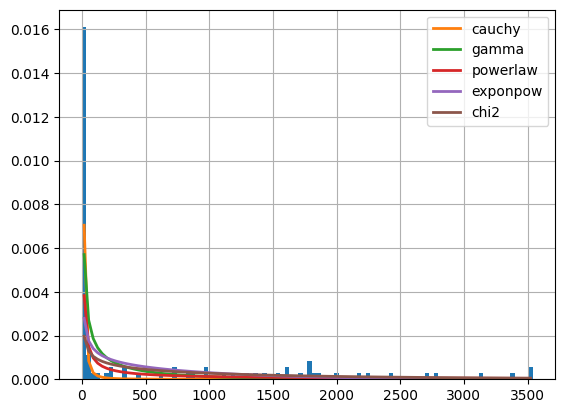

In [6]:
p_counts,_ = np.histogram(interval_counts,bins=access_bins)
print(p_counts)

f = Fitter(p_counts, distributions=fitter.get_common_distributions())
f.fit()
f.summary()

[115711960]
[16 11 11 ... 22 26 28]


Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.97it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.038593,1167.125211,-822687.323127,inf,0.058658,1.760437e-173
chi2,0.038593,1167.125823,-822687.318135,inf,0.058658,1.757142e-173
lognorm,0.038640,1158.716596,-822616.555675,inf,0.060197,1.095226e-182
rayleigh,0.039494,1126.281488,-821362.838452,inf,0.089741,0.000000e+00
norm,0.040196,1392.406428,-820343.127990,inf,0.089364,0.000000e+00


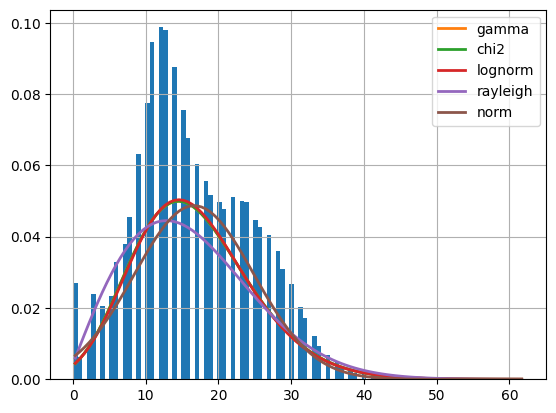

In [7]:
import os
import numpy as np
import argparse
import re
import sqlite3
from fitter import Fitter
import fitter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from matplotlib import ticker

db_path = '/nfs/home/zhangchuanqi/lvna/for_xs/catlog/single-profiling/xalancbmk/l3-8/hm.db'
con = sqlite3.connect(db_path)
cur = con.cursor()

all_set = 16384
class SaturatedInteger:
    def __init__(self, val, lo, hi):
        self.real, self.lo, self.hi = val, lo, hi

    def __add__(self, other):
        return min(self.real + other.real, self.hi)

    def __sub__(self, other):
        return max(self.real - other.real, self.lo)

    def isSaturated(self):
        return self.real == self.hi
    def isLowSaturated(self):
        return self.real == self.lo

    def isHighHalf(self):
        return self.real > (self.hi + self.lo)/2
    def idLowHalf(self):
        return self.real <= (self.hi + self.lo)/2

    def isHighPortion(self,portion):
        return self.real > self.hi*portion + self.lo*(1-portion)
    def isLowPortion(self,portion):
        return self.real <= self.hi*portion + self.lo*(1-portion)

    def __get__(self):
        return self.real
    def __set__(self, val):
        if val > self.hi:
            self.real = self.hi
        elif val < self.lo:
            self.real = self.lo
        else:
            self.real = val

max_time_query = "SELECT max(STAMP) FROM HitMissTrace"

interval = 2000
f = cur.execute(max_time_query)
out_res = [x[0] for x in f]
print(out_res)
nbins = out_res[0] // interval

all_access_query = 'SELECT STAMP FROM HitMissTrace'
f = cur.execute(all_access_query)
out_res = [x[0] for x in f]
interval_counts,_ = np.histogram(out_res,bins=nbins)
print(interval_counts)


f = Fitter(interval_counts, distributions=fitter.get_common_distributions())
f.fit()
f.summary()

[115711960]
[16 11 11 ... 22 26 28]


Fitting 106 distributions:  78%|███████▊  | 83/106 [01:11<00:35,  1.54s/it]WARNING:root:SKIPPED powerlognorm distribution (taking more than 30 seconds)
/nfs/home/zhangchuanqi/.local/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 106 distributions:  84%|████████▍ | 89/106 [01:19<00:25,  1.52s/it]/nfs/home/zhangchuanqi/.local/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:879: IntegrationWarning: The integral is probably divergent,

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace_asymmetric,0.038177,1038.005660,-823314.159017,inf,0.073645,2.518930e-273
gumbel_r,0.038357,1041.700739,-823053.595708,inf,0.053536,1.459544e-144
genlogistic,0.038478,1087.668258,-822859.622688,inf,0.052537,3.168216e-139
erlang,0.038593,1167.125278,-822687.323874,inf,0.058658,1.763579e-173
gamma,0.038593,1167.125211,-822687.323127,inf,0.058658,1.760437e-173


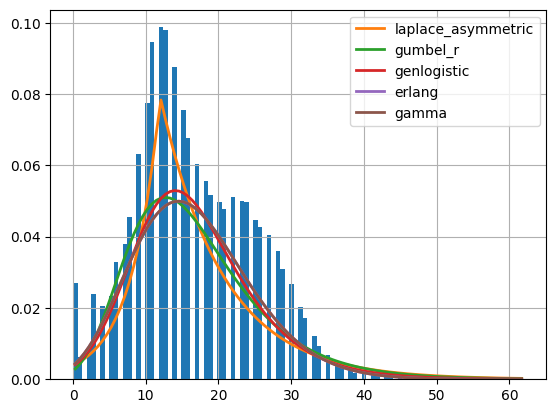

In [8]:
import os
import numpy as np
import argparse
import re
import sqlite3
from fitter import Fitter
import fitter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from matplotlib import ticker

db_path = '/nfs/home/zhangchuanqi/lvna/for_xs/catlog/single-profiling/xalancbmk/l3-8/hm.db'
con = sqlite3.connect(db_path)
cur = con.cursor()

all_set = 16384
class SaturatedInteger:
    def __init__(self, val, lo, hi):
        self.real, self.lo, self.hi = val, lo, hi

    def __add__(self, other):
        return min(self.real + other.real, self.hi)

    def __sub__(self, other):
        return max(self.real - other.real, self.lo)

    def isSaturated(self):
        return self.real == self.hi
    def isLowSaturated(self):
        return self.real == self.lo

    def isHighHalf(self):
        return self.real > (self.hi + self.lo)/2
    def idLowHalf(self):
        return self.real <= (self.hi + self.lo)/2

    def isHighPortion(self,portion):
        return self.real > self.hi*portion + self.lo*(1-portion)
    def isLowPortion(self,portion):
        return self.real <= self.hi*portion + self.lo*(1-portion)

    def __get__(self):
        return self.real
    def __set__(self, val):
        if val > self.hi:
            self.real = self.hi
        elif val < self.lo:
            self.real = self.lo
        else:
            self.real = val

max_time_query = "SELECT max(STAMP) FROM HitMissTrace"

interval = 2000
f = cur.execute(max_time_query)
out_res = [x[0] for x in f]
print(out_res)
nbins = out_res[0] // interval

all_access_query = 'SELECT STAMP FROM HitMissTrace'
f = cur.execute(all_access_query)
out_res = [x[0] for x in f]
interval_counts,_ = np.histogram(out_res,bins=nbins)
print(interval_counts)


# f = Fitter(interval_counts, distributions=fitter.get_common_distributions())
f = Fitter(interval_counts)
f.fit()
f.summary()